In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#load data
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


For each question, make sure to:

    State your Null Hypothesis and Alternative Hypothesis
    Select the correct test according to the data type and number of samples
    Test the assumptions of your selected test.
    Execute the selected test, or the alternative test (if you do not meet the assumptions)
    Interpret your p-value and reject or fail to reject your null hypothesis 
    Show a supporting visualization that helps display the result

## Do smokers have higher insurance charges than non-smokers?

### 1) State your Null Hypothesis and Alternative Hypothesis

> $H_0$ (Null Hypothesis): Insurance charges are the same for both smokers and non-smokers

> $H_A$ (Alternative Hypothesis): Smokers have significantly higher insurance charges than non-smokers.

### 2) Select the correct test according to the data type and number of samples

>Insurance charges is a numerical column and we have 2 samples, smokers and non-smokers, to compare. Therefore, we will be using a 2 Samples T-Test.

### 3) Test the assumptions of your selected test

>The 2-sample T-Test has the following assumptions:
 - No significant outliers
 - Normality
 - Equal Variance

In [3]:
#seperate out the colujmns we are interested in
smoker_df = df.loc[df['smoker']=='yes', ['charges','smoker']]
non_smoker_df = df.loc[df['smoker']=='no', ['charges','smoker']]
non_smoker_df.head()

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no


In [4]:
#concat the above dataframes for initial visualization
plot_df = pd.concat([smoker_df, non_smoker_df], axis=0)
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


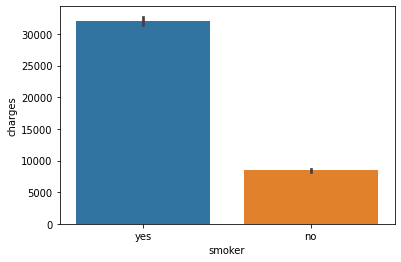

In [5]:
#initial visualization for comparison later
ax = sns.barplot(data=plot_df, x='smoker', y='charges', ci=68)

>The initial visualization indicates that smokers receive much larger charges than non-smokers.

In [6]:
#save the dataframes into panda series groups to make testing workflow easier
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
display(smoker_group.head(), non_smoker_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

#### Checking for outliers

In [7]:
## Check for absolute value of z-scores that are > 3
is_outlier_smoker = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smoker.sum()} outliers in the smoker group out of {len(smoker_group)})")

There are 0 outliers in the smoker group out of 274)


In [8]:
#perform the same check on the non-smokers group
is_outlier_non_smoker = np.abs(stats.zscore(non_smoker_group)) > 3
print(f"There are {is_outlier_non_smoker.sum()} outliers in the non-smoker group out of {len(non_smoker_group)})")

There are 24 outliers in the non-smoker group out of 1064)


In [9]:
#remove non-smoker outliers
non_smoker_group = non_smoker_group.loc[~is_outlier_non_smoker]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Check for Normality


>Both groups are n > 15, so we can ignore the assumption of normality

#### Checking for Equal Variance

In [10]:
result = stats.levene(smoker_group, non_smoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


> For the Levene test, the null hypothesis is that both groups have equal variance. With a p value less than .05, we reject the null and conclude that the two groups do not have equal variance.

>As such, we will be running our test with equal_var=False

#### Statistical Test


In [11]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

#### Conclusion

>The result of our test returned a p-value much, much less than .05. We reject the null hypothesis that there is not difference in charges between smokers and non-smokers. The visualization below will show the difference between the mean of our two final groups

In [12]:
plot_df = pd.concat([smoker_df.loc[~is_outlier_smoker], 
                     non_smoker_df.loc[~is_outlier_non_smoker]], axis=0)
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


<AxesSubplot:xlabel='smoker', ylabel='charges'>

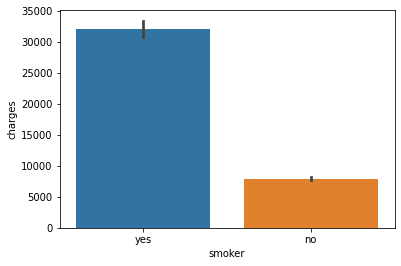

In [13]:
sns.barplot(data=plot_df, x='smoker',y='charges')

##  Are men more likely to smoke than women?

to do
 - formulate hypothesis
 - create male_smoker, male_non_smoker, female_smoker, female_non_smoker groups
 - test assumptions for Chi-Square test as target is categorical

## Do different regions have different charges, on average?

to do
 - formulate hypothesis
 - create groups for each region + charges for that region
 - test assumptions for ANOVA or Tukey test, as target is numrical and there are more than two regions